<a href="https://colab.research.google.com/github/JulieOnIsland/Machine_Learning/blob/main/spam_binary_classification_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam binary classification using SimpleRNN


## Data Preparing & Preprossessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data/spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
print('Total number of samples :',len(data))

Total number of samples : 5572


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
print('Nan :',data.isnull().values.any())

Nan : False


In [9]:
print('unique value :',data['v2'].nunique())

unique value : 5169


In [10]:
# delete non-unique sample
data.drop_duplicates(subset=['v2'], inplace=True)
print('Total number of sample :',len(data))

Total number of sample : 5169


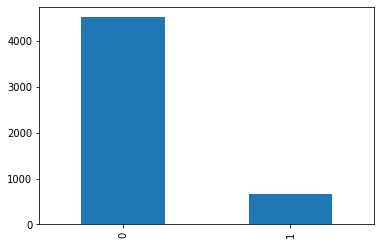

In [11]:
data['v1'].value_counts().plot(kind='bar');

In [12]:
print('Number of legitimate and spam mail')
print(data.groupby('v1').size().reset_index(name='count'))

Number of legitimate and spam mail
   v1  count
0   0   4516
1   1    653


In [13]:
print(f'legitimate mail(%)  = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'spam mail(%) = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

legitimate mail(%)  = 87.367%
spam mail(%) = 12.633%


In [14]:
X_data = data['v2']
y_data = data['v1']
print('number of mail: {}'.format(len(X_data)))
print('number of labels: {}'.format(len(y_data)))

number of mail: 5169
number of labels: 5169


- The ratio of legitimate mail and spam mail is quite imbalanced. So in order to make balanced label in training and test set, use `stratify` in Scikit learn test_train_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [16]:
# training set
print(f'legitimate mail(%) = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'spam mail(%) = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

legitimate mail(%) = 87.376%
spam mail(%) = 12.624%


In [18]:
# test set
print(f'legitimate mail(%) = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'spam mail(%) = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

legitimate mail(%) = 87.331%
spam mail(%) = 12.669%


## Tokenizing

In [24]:
tokenizer = Tokenizer()

# fit_on_texts: updates vocab based on a list of texts and assume each list to be a token
tokenizer.fit_on_texts(X_train)

# texts_to_sequences: transforms each text in texts to a sequence of integers
X_train_encoded = tokenizer.texts_to_sequences(X_train)

In [25]:
for i in range(5):
    print(X_train_encoded[i])

[102, 1, 210, 230, 3, 17, 39]
[1, 59, 8, 427, 17, 5, 137, 2, 2326]
[157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512]
[1, 1154, 13, 104, 292]
[222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]


In [84]:
# check words randomly
word_to_index = tokenizer.word_index
dic_keys = list(word_to_index.keys())
# len(dic_keys)

import random
for _ in range(5):
    print(dic_keys[random.randint(0, 7821)])

if
let's
fortune
6
conversations


In [90]:
# check top 5 frequent words
word_to_index = tokenizer.word_index
dic_keys = list(word_to_index.keys())

for i in range(5):
    print(dic_keys[i])

i
to
you
a
the


In [89]:
# (word, frequency)
word_counts_list = list(tokenizer.word_counts.items())
for i in range(5):
    print(word_counts_list[i])

('sorry', 101)
('i', 1832)
("can't", 47)
('help', 44)
('you', 1644)


In [76]:
vocab_size = len(word_to_index) + 1  # plus 1 for padding token
vocab_size

7822

max length of mail : 189
avg length of mail : 15.75


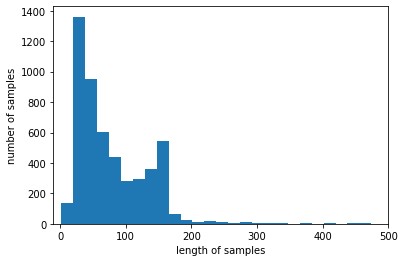

In [46]:
print(f'max length of mail : {max(len(sample) for sample in X_train_encoded)}')
print(f'avg length of mail : {round(sum(map(len, X_train_encoded))/len(X_train_encoded),2)}')
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.xlim([-10, 500])
plt.show()

In [50]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("shape of training set:", X_train_padded.shape)

shape of training set: (4135, 189)


## Simple RNN

In [54]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [56]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

- `RMSprop optimizer`: 
    - Maintain a moving (discounted) average of the square of gradients
    - Divide the gradient by the root of this average

### batch_size = 32

In [58]:
# fit the model
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=32, validation_split=0.2)

Epoch 1/4
104/104 [==============================] - 24s 234ms/step - loss: 0.0293 - accuracy: 0.9918 - val_loss: 0.0930 - val_accuracy: 0.9661
Epoch 2/4
104/104 [==============================] - 25s 236ms/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.0684 - val_accuracy: 0.9831
Epoch 3/4
104/104 [==============================] - 25s 236ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0632 - val_accuracy: 0.9831
Epoch 4/4
104/104 [==============================] - 24s 235ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.0687 - val_accuracy: 0.9843


In [59]:
# evaluate the model
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n test accuracy: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 1s 22ms/step - loss: 0.1076 - accuracy: 0.9768

 test accuracy: 0.9768


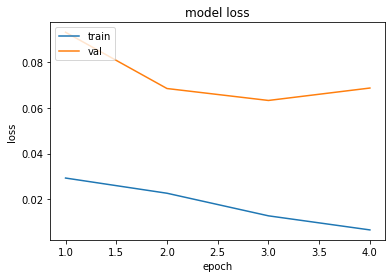

In [63]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- It seems like it is overfitting after epoch 3.

## batch_size = 64

In [68]:
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [69]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [73]:
# fit the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
52/52 [==============================] - 12s 230ms/step - loss: 0.1249 - accuracy: 0.9637 - val_loss: 0.0946 - val_accuracy: 0.9770
Epoch 2/10
52/52 [==============================] - 12s 232ms/step - loss: 0.0642 - accuracy: 0.9816 - val_loss: 0.1525 - val_accuracy: 0.9456
Epoch 3/10
52/52 [==============================] - 12s 230ms/step - loss: 0.0577 - accuracy: 0.9807 - val_loss: 0.1866 - val_accuracy: 0.9347
Epoch 4/10
52/52 [==============================] - 12s 230ms/step - loss: 0.0475 - accuracy: 0.9840 - val_loss: 0.0711 - val_accuracy: 0.9758
Epoch 5/10
52/52 [==============================] - 12s 230ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0710 - val_accuracy: 0.9807
Epoch 6/10
52/52 [==============================] - 12s 231ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0519 - val_accuracy: 0.9867
Epoch 7/10
52/52 [==============================] - 12s 234ms/step - loss: 0.0116 - accuracy: 0.9976 - val_loss: 0.0542 - val_accuracy: 0.9855

In [74]:
# evaluate the model
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n test accuracy: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 1s 21ms/step - loss: 0.0993 - accuracy: 0.9778

 test accuracy: 0.9778


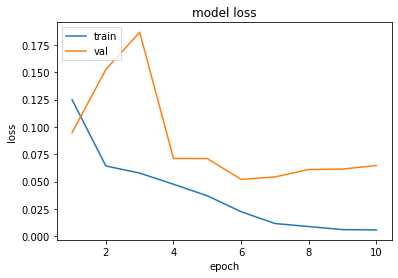

In [75]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()